Sales Analysis of Apparells ( A Simplilearn Project)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

#sanity check
print(df.head())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


Data Wrangling 

a. Check for missing values 
b. recommend ways to treat missing values in this specific dataset 
c. Choose either standardization or normalization 
d. share my insight in the use of groupby()

In [3]:
#check for null values
print(df.isnull())
print(df.notna())

# the data frame has no missing values 

       Date   Time  State  Group   Unit  Sales
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
7555  False  False  False  False  False  False
7556  False  False  False  False  False  False
7557  False  False  False  False  False  False
7558  False  False  False  False  False  False
7559  False  False  False  False  False  False

[7560 rows x 6 columns]
      Date  Time  State  Group  Unit  Sales
0     True  True   True   True  True   True
1     True  True   True   True  True   True
2     True  True   True   True  True   True
3     True  True   True   True  True   True
4     True  True   True   True  True   True
...    ...   ...    ...    ...   ...    ...
7555  True  True   True   True  True   True
7556  True  True   True   True  True   True
7557  True  Tru

Recommendations for treating missing and incorrect data 
1. Impuatation ( mean and median Imputation )
2. Removing it 
3. Forward filling and backward filling ( for time series data )

Text(0.5, 0, 'Sales')

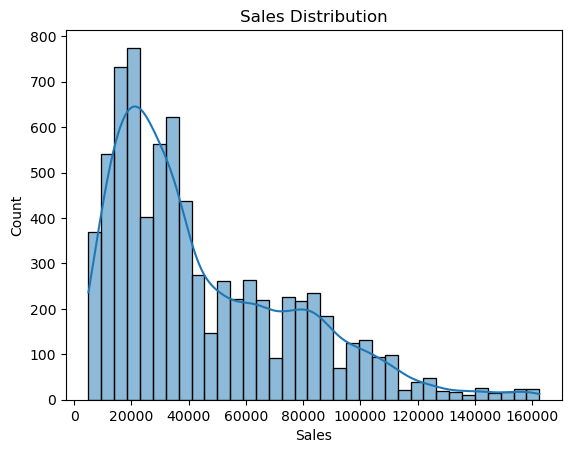

In [4]:
#Normalization or Standardization
#To know which data wrangling technique to use, we need to check the distribution of the data

sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')     



In [5]:
#We use the MinMaxScaler to normalize the data 
scaler = MinMaxScaler()
df['Sales'] = scaler.fit_transform(df[['Sales']])

df['Sales'].describe()

df.head()


# The column 'Sales' has been normalized to a range of 0 to 1.



,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,0.095238
1,1-Oct-2020,Morning,WA,Men,8,0.095238
2,1-Oct-2020,Morning,WA,Women,4,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,0.015873


The use of GroupBY() in python for merging 
This is used to group unique variables in different regions 
During analysis this could be used to get the total sales in a specific region and compare with another region while being merged in a single dataframe 


Data Visualization 

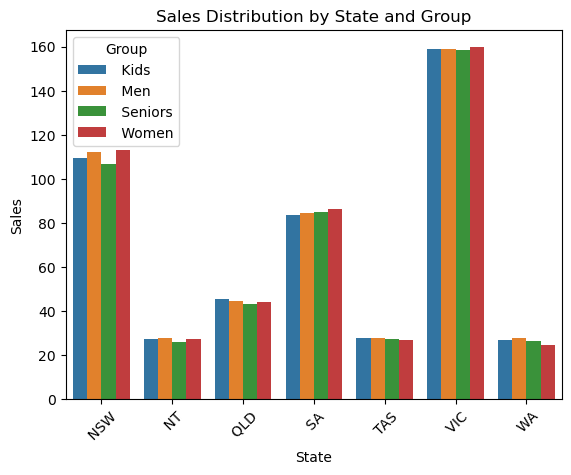

In [6]:
#Sate wise sales distribution for different Group 
# we would use grouped histogram to show the distribution of sales for each state with each of the demographic in different bars 
# we would use the groupby function to group the data by state and demographic
grouped = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()


# grouped.head()
# grouped.tail()
sns.barplot(x='State', y='Sales', hue='Group', data=grouped)
plt.title('Sales Distribution by State and Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.show()



In [8]:
print(df['Sales'].mean())
print(df['Sales'].median())
print(df['Sales'].mode())
print(df['Sales'].std())
# The mean, median and mode of the sales distribution are all close to each other, indicating that the data is normally distributed.

print(df['Unit'].mean())
print(df['Unit'].median())
print(df['Unit'].mode())
print(df['Unit'].std())

hightest_avg = df[df['Sales'] == df['Sales'].max()]
print(hightest_avg)

0.25405433778449654
0.1904761904761905
0    0.111111
Name: Sales, dtype: float64
0.2047841710728009
18.00542328042328
14.0
0    9
Name: Unit, dtype: int64
12.901402777586458
             Date        Time State     Group  Unit  Sales
5423   5-Dec-2020     Evening   VIC   Seniors    65    1.0
5759   9-Dec-2020     Evening   VIC   Seniors    65    1.0
5842  10-Dec-2020     Evening   VIC     Women    65    1.0
6174  14-Dec-2020   Afternoon   VIC     Women    65    1.0
6340  16-Dec-2020   Afternoon   VIC      Kids    65    1.0
6598  19-Dec-2020     Evening   VIC     Women    65    1.0
6931  23-Dec-2020   Afternoon   VIC   Seniors    65    1.0
7019  24-Dec-2020     Evening   VIC   Seniors    65    1.0
7354  28-Dec-2020     Evening   VIC     Women    65    1.0
7432  29-Dec-2020   Afternoon   VIC      Kids    65    1.0
7515  30-Dec-2020     Morning   VIC   Seniors    65    1.0


In [ ]:
#To check the group with the highest sales 
grouped_for_mean = df.groupby(['Group'])['Sales'].mean().reset_index()
hightest_avg = grouped_for_mean.idxmax
print(hightest_avg)

<bound method DataFrame.idxmax of       Group     Sales
0      Kids  0.254044
1       Men  0.256320
2   Seniors  0.250567
3     Women  0.255287>


In [ ]:
df_Sales = pd.Series({
'Kids'  : 0.254044,
'Men' : 0.256320,
'Seniors' : 0.250567,
'Women' : 0.255287,

})

print(f'The group with the highest sales is {df_Sales.idxmax()} with a sales of {df_Sales.max()}')
print(f'The group with the lowest sales is {df_Sales.idxmin()} with a sales of {df_Sales.min()}')

The group with the highest sales is Men with a sales of 0.25632
The group with the lowest sales is Seniors with a sales of 0.250567


After the analysis was done it was discovered that the froup with the highest mean are Men and the group with the lowest mean are Seniors  This says that the group with the highest amount of sales are men  and the grtoup with the lowest amount of sales  are seniors even though the differences between them are small  

In [11]:
#Generate Daily , Weekly and Monthly sales
# we would use the groupby function to group the data by date and sum the sales for each date
df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%y')
